A player must have a minimum of 3,000 plate appearances in order to qualify for overall BA record
****Maybe Drop players who havent played in a full seasons worth of games?****
****Need to fix integrating player name and yearID (Do we do a range?)
****Figure out how we decide who belongs in each decade
*If we want to do regression- data has to be on career level- but then parsing out decades is hard
    *Maybe we then do regression of what plays into getting into HOF overall and then use a groupby decade to show differences 
     in summary statisics over time- do hypothesis testing on this to tell if players are statistically better now vs then?
****Want column of binary 1 or 0 for whether or not player is in HOF
*Run ANNOVA to see if any decade is significantly differnt from the rest over x metric (ie homeruns or BA)
*Chi squared test of hall of famers per decade to see if each decade put out a expected proportion of hall of famers

In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [22]:
#Importing data into dataframes
HOF_Batting = pd.read_csv('Output/HOF_Batting_stats.csv')
HOF_Post_Batting = pd.read_csv('Output/HOF_Postseason_Batting_stats.csv')
Post_Batting = pd.read_csv('Output/Postseason_Batting_stats.csv')
Reg_Batting = pd.read_csv('Output/Reg_season_Batting_stats.csv')

#Sorted versions
#HOF_Batting = pd.read_csv('Output/sorted_hof_rs_stats.csv')
#HOF_Post_Batting = pd.read_csv('Output/sorted_hof_ps_stats.csv')
#Post_Batting = pd.read_csv('Output/sorted_ps_stats.csv')
#Reg_Batting = pd.read_csv('Output/sorted_rs_stats.csv')



In [23]:
HOF_Batting.head()


,playerID,Name,yearID,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP
0,aaronha01,Hank Aaron,1954,122,468,58,131,27,6,13,69.0,28,0.0,3.0
1,aaronha01,Hank Aaron,1955,153,602,105,189,37,9,27,106.0,49,5.0,3.0
2,aaronha01,Hank Aaron,1956,153,609,106,200,34,14,26,92.0,37,6.0,2.0
3,aaronha01,Hank Aaron,1957,151,615,118,198,27,6,44,132.0,57,15.0,0.0
4,aaronha01,Hank Aaron,1958,153,601,109,196,34,4,30,95.0,59,16.0,1.0


In [89]:
#Create decades column for Regular Season Batting
conditions = [ Reg_Batting["yearID"] < 1950,
               (Reg_Batting["yearID"] >= 1950) & (Reg_Batting['yearID'] < 1960), (Reg_Batting["yearID"] >= 1960) & (Reg_Batting["yearID"] < 1970),
               (Reg_Batting["yearID"] >= 1970) & (Reg_Batting["yearID"] < 1980), (Reg_Batting["yearID"] >= 1980) & (Reg_Batting["yearID"] < 1990),
               (Reg_Batting["yearID"] >= 1990) & (Reg_Batting["yearID"] < 2000), (Reg_Batting["yearID"] >= 2000) & (Reg_Batting["yearID"] < 2010),
               Reg_Batting["yearID"] < 2020
             ]
choices     =['40','50', '60', '70',' 80', '90','200', '210']
Reg_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#Reg_Batting

In [53]:
#Create decades column for Hall of Fame regular season batting
conditions = [ HOF_Batting["yearID"] < 1950,
               (HOF_Batting["yearID"] >= 1950) & (HOF_Batting['yearID'] < 1960), (HOF_Batting["yearID"] >= 1960) & (HOF_Batting["yearID"] < 1970),
               (HOF_Batting["yearID"] >= 1970) & (HOF_Batting["yearID"] < 1980), (HOF_Batting["yearID"] >= 1980) & (HOF_Batting["yearID"] < 1990),
               (HOF_Batting["yearID"] >= 1990) & (HOF_Batting["yearID"] < 2000), (HOF_Batting["yearID"] >= 2000) & (HOF_Batting["yearID"] < 2010),
               HOF_Batting["yearID"] < 2020
             ]
choices     = ['pre50s','50s', '60s', '70s',' 80s', '90s','00s', '10s']
HOF_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#HOF_Batting

In [55]:
#Create decades column for Post Season Batting
conditions = [ Post_Batting["yearID"] < 1950,
               (Post_Batting["yearID"] >= 1950) & (Post_Batting['yearID'] < 1960), (Post_Batting["yearID"] >= 1960) & (Post_Batting["yearID"] < 1970),
               (Post_Batting["yearID"] >= 1970) & (Post_Batting["yearID"] < 1980), (Post_Batting["yearID"] >= 1980) & (Post_Batting["yearID"] < 1990),
               (Post_Batting["yearID"] >= 1990) & (Post_Batting["yearID"] < 2000), (Post_Batting["yearID"] >= 2000) & (Post_Batting["yearID"] < 2010),
               Post_Batting["yearID"] < 2020
             ]
choices     = ['pre50s','50s', '60s', '70s',' 80s', '90s','00s', '10s']
Post_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#Post_Batting

In [57]:
#Create decades column for Hall of Fame Post-season Batting
conditions = [ HOF_Post_Batting["yearID"] < 1950,
               (HOF_Post_Batting["yearID"] >= 1950) & (HOF_Post_Batting['yearID'] < 1960), (HOF_Post_Batting["yearID"] >= 1960) & (HOF_Post_Batting["yearID"] < 1970),
               (HOF_Post_Batting["yearID"] >= 1970) & (HOF_Post_Batting["yearID"] < 1980), (HOF_Post_Batting["yearID"] >= 1980) & (HOF_Post_Batting["yearID"] < 1990),
               (HOF_Post_Batting["yearID"] >= 1990) & (HOF_Post_Batting["yearID"] < 2000), (HOF_Post_Batting["yearID"] >= 2000) & (HOF_Post_Batting["yearID"] < 2010),
               HOF_Post_Batting["yearID"] < 2020
             ]
choices     = ['pre50s','50s', '60s', '70s',' 80s', '90s','00s', '10s']
HOF_Post_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#HOF_Post_Batting

In [61]:
#Using GroupBy playerID to get career statistics for players
career_HOF_Post_Batting = HOF_Post_Batting.groupby(['playerID','Name','Decade']).agg({
             'yearID':['min', 'max'],
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
career_HOF_Post_Batting.head()

playerID            Name  Decade yearID         G   AB   R   H  2B  3B  \
                                        min   max sum  sum sum sum sum sum   
0  aaronha01      Hank Aaron     50s   1957  1958  14   55   8  20   2   1   
1  aaronha01      Hank Aaron     60s   1969  1969   3   14   3   5   2   0   
2  alexape01  Pete Alexander  pre50s   1915  1928   7   13   1   1   0   0   
3  alomaro01  Roberto Alomar     00s   2001  2001   5   21   3   4   3   0   
4  alomaro01  Roberto Alomar     90s   1991  1999  53  209  29  68  14   1   

   HR RBI  BB IBB  HBP  
  sum sum sum sum  sum  
0   3   9   5   0  0.0  
1   3   7   0   0  0.0  
2   0   1   0   0  0.0  
3   0   3   2   0  0.0  
4   4  30  25   3  0.0

In [58]:
#Using GroupBy playerID to get career statistics for players
career_HOF_Batting = HOF_Batting.groupby(['playerID','Name','Decade']).agg({
             'yearID':['min', 'max','count'],
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
career_HOF_Batting.head()



playerID            Name  Decade yearID                 G    AB     R  \
                                        min   max count   sum   sum   sum   
0  aaronha01      Hank Aaron     50s   1954  1959     6   886  3524   612   
1  aaronha01      Hank Aaron     60s   1960  1969    10  1540  5912  1091   
2  aaronha01      Hank Aaron     70s   1970  1976     7   872  2928   471   
3  alexape01  Pete Alexander  pre50s   1911  1930    21   703  1810   154   
4  alomaro01  Roberto Alomar     80s   1988  1989     2   301  1168   166   

      H   2B  3B   HR     RBI   BB    IBB   HBP  
    sum  sum sum  sum     sum  sum    sum   sum  
0  1137  205  46  179   617.0  281   59.0  13.0  
1  1819  309  45  375  1107.0  672  160.0  12.0  
2   815  110   7  201   573.0  449   74.0   7.0  
3   378   60  13   11   163.0   77    0.0   2.0  
4   329   51   7   16    97.0  100    9.0   4.0

In [59]:
#Using GroupBy playerID to get career statistics for players
career_Post_Batting = Post_Batting.groupby(['playerID','Name','Decade']).agg({
             'yearID':['min', 'max','count'],
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
career_Post_Batting.head()

playerID           Name Decade yearID               G  AB   R   H  2B  3B  \
                                      min   max count sum sum sum sum sum sum   
0  aaronha01     Hank Aaron    50s   1957  1958     2  14  55   8  20   2   1   
1  aaronha01     Hank Aaron    60s   1969  1969     1   3  14   3   5   2   0   
2  aaronto01   Tommie Aaron    60s   1969  1969     1   1   1   0   0   0   0   
3   aasedo01       Don Aase    70s   1979  1979     1   2   0   0   0   0   0   
4   abadfe01  Fernando Abad    10s   2014  2014     1   1   0   0   0   0   0   

   HR RBI  BB IBB  HBP  
  sum sum sum sum  sum  
0   3   9   5   0  0.0  
1   3   7   0   0  0.0  
2   0   0   0   0  0.0  
3   0   0   0   0  0.0  
4   0   0   0   0  0.0

In [90]:
#Using GroupBy playerID to get career statistics for players
career_Reg_Batting = Reg_Batting.groupby(['playerID','Name','Decade']).agg({
             'yearID':['min', 'max','count'],
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
career_Reg_Batting.head()

playerID           Name Decade yearID                 G    AB     R     H  \
                                      min   max count   sum   sum   sum   sum   
0  aardsda01  David Aardsma    200   2004  2009     5   201     3     0     0   
1  aardsda01  David Aardsma    210   2010  2015     4   130     1     0     0   
2  aaronha01     Hank Aaron     50   1954  1959     6   886  3524   612  1137   
3  aaronha01     Hank Aaron     60   1960  1969    10  1540  5912  1091  1819   
4  aaronha01     Hank Aaron     70   1970  1976     7   872  2928   471   815   

    2B  3B   HR     RBI   BB    IBB   HBP  
   sum sum  sum     sum  sum    sum   sum  
0    0   0    0     0.0    0    0.0   0.0  
1    0   0    0     0.0    0    0.0   0.0  
2  205  46  179   617.0  281   59.0  13.0  
3  309  45  375  1107.0  672  160.0  12.0  
4  110   7  201   573.0  449   74.0   7.0

# By Decade

In [91]:
#Using GroupBy playerID to get career statistics for players
decade_Reg_Batting = Reg_Batting.groupby(['Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
decade_Reg_Batting.head()

,Decade,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP
0,80,548349,1385808,174830,358866,61757,9141,32942,163929.0,131164,13024.0,7255.0
1,200,689600,1667218,231182,442513,89106,9246,52148,220190.0,162490,13181.0,17539.0
2,210,629319,1490041,189752,378189,74663,7766,45155,180665.0,134841,9287.0,14723.0
3,40,1717258,5632934,777574,1499451,233874,75800,52819,651439.0,479564,0.0,38266.0
4,50,307794,843489,110049,218774,34588,7063,20860,103213.0,88209,3631.0,4788.0


In [92]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
decade_Reg_Batting['BA'] = decade_Reg_Batting['H'] / decade_Reg_Batting['AB']
decade_Reg_Batting['OBP'] = (
    (decade_Reg_Batting['H'] + decade_Reg_Batting['BB']  + decade_Reg_Batting['HBP']) 
    / (decade_Reg_Batting['AB'] + decade_Reg_Batting['BB']  + decade_Reg_Batting['HBP'])
                               )
decade_Reg_Batting['SLG']= ( ((decade_Reg_Batting['H'] - (decade_Reg_Batting['2B'] + decade_Reg_Batting['3B'] + decade_Reg_Batting['HR']) )
                              + 2*decade_Reg_Batting['2B'] + 3*decade_Reg_Batting['3B'] + 4*decade_Reg_Batting['HR'])
                            / (decade_Reg_Batting['AB'])
                            )
decade_Reg_Batting['OPS']= decade_Reg_Batting['SLG'] + decade_Reg_Batting['OBP']
decade_Reg_Batting

,Decade,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP,BA,OBP,SLG,OPS
0,80,548349,1385808,174830,358866,61757,9141,32942,163929.0,131164,13024.0,7255.0,0.258958,0.326254,0.388027,0.714281
1,200,689600,1667218,231182,442513,89106,9246,52148,220190.0,162490,13181.0,17539.0,0.265420,0.337011,0.423793,0.760804
2,210,629319,1490041,189752,378189,74663,7766,45155,180665.0,134841,9287.0,14723.0,0.253811,0.321878,0.405257,0.727135
3,40,1717258,5632934,777574,1499451,233874,75800,52819,651439.0,479564,0.0,38266.0,0.266194,0.327972,0.362756,0.690729
4,50,307794,843489,110049,218774,34588,7063,20860,103213.0,88209,3631.0,4788.0,0.259368,0.332916,0.391313,0.724229
5,60,409718,1080332,128986,268647,41208,7761,26169,119959.0,100046,10399.0,6991.0,0.248671,0.316400,0.373852,0.690252
6,70,515107,1343463,164635,344432,54973,9227,29543,153469.0,130770,13443.0,7688.0,0.256376,0.325854,0.377002,0.702856
7,90,604456,1478955,201980,391332,73190,8638,41349,190603.0,148096,12203.0,12060.0,0.264600,0.336456,0.409644,0.746100


In [93]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
Reg_Batting['BA'] = Reg_Batting['H'] / Reg_Batting['AB']
Reg_Batting['OBP'] = (
    (Reg_Batting['H'] + Reg_Batting['BB']  + Reg_Batting['HBP']) 
    / (Reg_Batting['AB'] + Reg_Batting['BB']  + Reg_Batting['HBP'])
                               )
Reg_Batting['SLG']= ( ((Reg_Batting['H'] - (Reg_Batting['2B'] + Reg_Batting['3B'] + Reg_Batting['HR']) )
                              + 2*Reg_Batting['2B'] + 3*Reg_Batting['3B'] + 4*Reg_Batting['HR'])
                            / (Reg_Batting['AB'])
                            )
Reg_Batting['OPS']= Reg_Batting['SLG'] + Reg_Batting['OBP']
#Reg_Batting.head()

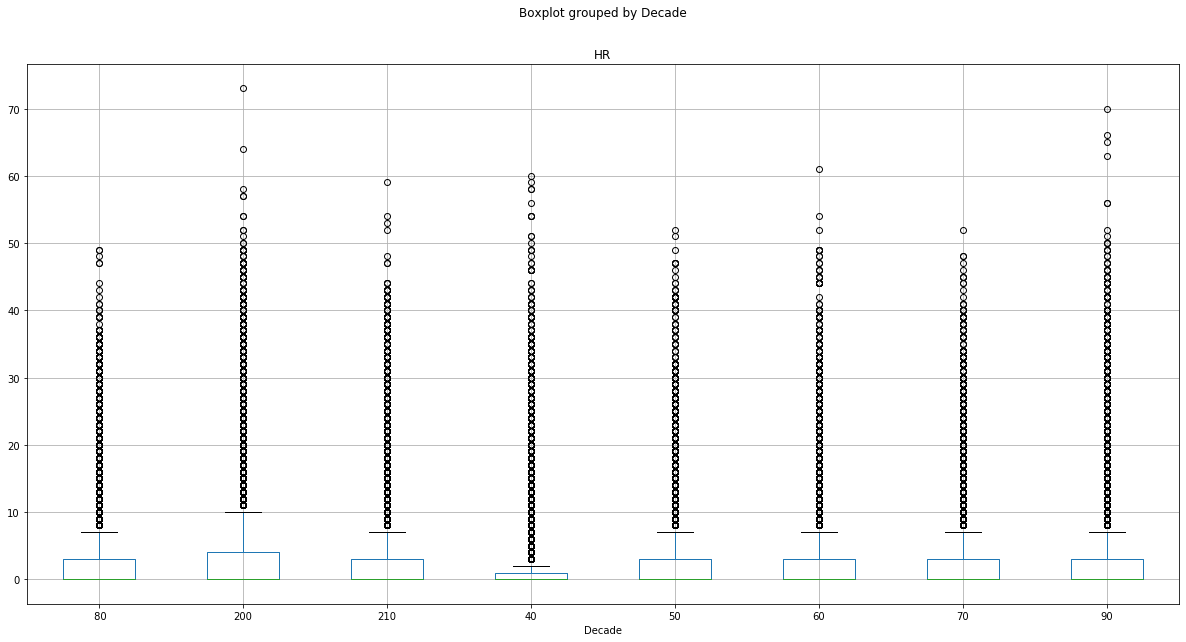

In [94]:
Reg_Batting.boxplot("HR", by="Decade", figsize=(20, 10))

In [102]:
group1 = decade_Reg_Batting[decade_Reg_Batting["Decade"] == 40]["HR"]
group2 = decade_Reg_Batting[decade_Reg_Batting["Decade"] == 50]["HR"]
group3 = decade_Reg_Batting[decade_Reg_Batting["Decade"] == 60]["HR"]
group4 = decade_Reg_Batting[decade_Reg_Batting["Decade"] == 70]["HR"]
group5 = decade_Reg_Batting[decade_Reg_Batting["Decade"] == 80]["HR"]
group6 = decade_Reg_Batting[decade_Reg_Batting["Decade"] == 90]["HR"]
group7 = decade_Reg_Batting[decade_Reg_Batting["Decade"] == 200]["HR"]
group8 = decade_Reg_Batting[decade_Reg_Batting["Decade"] == 210]["HR"]

In [103]:
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=nan, pvalue=nan)

In [79]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
Reg_Batting['BA'] = Reg_Batting['H'] / Reg_Batting['AB']
Reg_Batting['OBP'] = (
    (Reg_Batting['H'] + Reg_Batting['BB']  + Reg_Batting['HBP']) 
    / (Reg_Batting['AB'] + Reg_Batting['BB']  + Reg_Batting['HBP'])
                               )
Reg_Batting['SLG']= ( ((Reg_Batting['H'] - (Reg_Batting['2B'] + Reg_Batting['3B'] + Reg_Batting['HR']) )
                              + 2*Reg_Batting['2B'] + 3*Reg_Batting['3B'] + 4*Reg_Batting['HR'])
                            / (Reg_Batting['AB'])
                            )
Reg_Batting['OPS']= Reg_Batting['SLG'] + Reg_Batting['OBP']
Reg_Batting.head()

,playerID,Name,yearID,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP,Decade,BA,OBP,SLG,OPS
0,aardsda01,David Aardsma,2004,11,0,0,0,0,0,0,0.0,0,0.0,0.0,00s,NaN,NaN,NaN,NaN
1,aardsda01,David Aardsma,2006,45,2,0,0,0,0,0,0.0,0,0.0,0.0,00s,0.0,0.0,0.0,0.0
2,aardsda01,David Aardsma,2007,25,0,0,0,0,0,0,0.0,0,0.0,0.0,00s,NaN,NaN,NaN,NaN
3,aardsda01,David Aardsma,2008,47,1,0,0,0,0,0,0.0,0,0.0,0.0,00s,0.0,0.0,0.0,0.0
4,aardsda01,David Aardsma,2009,73,0,0,0,0,0,0,0.0,0,0.0,0.0,00s,NaN,NaN,NaN,NaN


In [66]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe Add sac flies
career_Reg_Batting['BA'] = career_Reg_Batting['H'] / career_Reg_Batting['AB']
career_Reg_Batting['OBP'] = (
    (career_Reg_Batting['H'] + career_Reg_Batting['BB']  + career_Reg_Batting['HBP']) 
    / (career_Reg_Batting['AB'] + career_Reg_Batting['BB']  + career_Reg_Batting['HBP'])
                               )
career_Reg_Batting['SLG']= ( ((career_Reg_Batting['H'] - (career_Reg_Batting['2B'] + career_Reg_Batting['3B'] + career_Reg_Batting['HR']) )
                              + 2*career_Reg_Batting['2B'] + 3*career_Reg_Batting['3B'] + 4*career_Reg_Batting['HR'])
                            / (career_Reg_Batting['AB'])
                            )
career_Reg_Batting['OPS']= career_Reg_Batting['SLG'] + career_Reg_Batting['OBP']
#career_Reg_Batting.head()

In [67]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career HOF Dataframe
career_HOF_Batting['BA'] = career_HOF_Batting['H'] / career_HOF_Batting['AB']
career_HOF_Batting['OBP'] = (
    (career_HOF_Batting['H'] + career_HOF_Batting['BB']  + career_HOF_Batting['HBP']) 
    / (career_HOF_Batting['AB'] + career_HOF_Batting['BB']  + career_HOF_Batting['HBP'])
                               )
career_HOF_Batting['SLG']= ( ((career_HOF_Batting['H'] - (career_HOF_Batting['2B'] + career_HOF_Batting['3B'] + career_HOF_Batting['HR']) )
                              + 2*career_HOF_Batting['2B'] + 3*career_HOF_Batting['3B'] + 4*career_HOF_Batting['HR'])
                            / (career_HOF_Batting['AB'])
                            )
career_HOF_Batting['OPS']= career_HOF_Batting['SLG'] + career_HOF_Batting['OBP']
#career_HOF_Batting.head()

In [68]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Postseason Dataframe
career_Post_Batting['BA'] = career_Post_Batting['H'] / career_Post_Batting['AB']
career_Post_Batting['OBP'] = (
    (career_Post_Batting['H'] + career_Post_Batting['BB']  + career_Post_Batting['HBP']) 
    / (career_Post_Batting['AB'] + career_Post_Batting['BB']  + career_Post_Batting['HBP'])
                               )
career_Post_Batting['SLG']= ( ((career_Post_Batting['H'] - (career_Post_Batting['2B'] + career_Post_Batting['3B'] + career_Post_Batting['HR']) )
                              + 2*career_Post_Batting['2B'] + 3*career_Post_Batting['3B'] + 4*career_Post_Batting['HR'])
                            / (career_Post_Batting['AB'])
                            )
career_Post_Batting['OPS']= career_Post_Batting['SLG'] + career_Post_Batting['OBP']
#career_Post_Batting.head()

In [69]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career HOF Postseason Dataframe
career_HOF_Post_Batting['BA'] = career_HOF_Post_Batting['H'] / career_HOF_Post_Batting['AB']
career_HOF_Post_Batting['OBP'] = (
    (career_HOF_Post_Batting['H'] + career_HOF_Post_Batting['BB']  + career_HOF_Post_Batting['HBP']) 
    / (career_HOF_Post_Batting['AB'] + career_HOF_Post_Batting['BB']  + career_HOF_Post_Batting['HBP'])
                               )
career_HOF_Post_Batting['SLG']= ( ((career_HOF_Post_Batting['H'] - (career_HOF_Post_Batting['2B'] + career_HOF_Post_Batting['3B'] + career_HOF_Post_Batting['HR']) )
                              + 2*career_HOF_Post_Batting['2B'] + 3*career_HOF_Post_Batting['3B'] + 4*career_HOF_Post_Batting['HR'])
                            / (career_HOF_Post_Batting['AB'])
                            )
career_HOF_Post_Batting['OPS']= career_HOF_Post_Batting['SLG'] + career_HOF_Post_Batting['OBP']
#career_HOF_Post_Batting.head()

In [70]:
#Getting some aggregated summary statistics to better understand the data
career_HOF_Batting_summary = career_HOF_Batting.G.agg(['mean','max', 'min', 'std'])
career_HOF_Post_Batting_summary = career_HOF_Post_Batting.BA.agg(['mean','max', 'min', 'std'])
career_Reg_Post_Batting_summary =career_Post_Batting.BA.agg(['mean','max', 'min', 'std'])
career_Reg_Batting_summary = career_Reg_Batting.BA.agg(['mean','max', 'min', 'std'])

In [13]:
print('Career Batting')
career_Reg_Batting_summary

Career Batting


mean    0.189494
max     1.000000
min     0.000000
std     0.119934
Name: BA, dtype: float64

In [14]:
print('Career HOF Batting')
career_HOF_Batting_summary

Career HOF Batting


,sum
mean,1673.952174
max,3308.000000
min,21.000000
std,825.307460


In [15]:
print('Career Postseason Batting')
career_Reg_Post_Batting_summary

Career Postseason Batting


mean    0.197457
max     1.000000
min     0.000000
std     0.181292
Name: BA, dtype: float64

In [16]:
print('Career HOF Postseason Batting')
career_HOF_Post_Batting_summary


Career HOF Postseason Batting


mean    0.234823
max     0.666667
min     0.000000
std     0.117593
Name: BA, dtype: float64

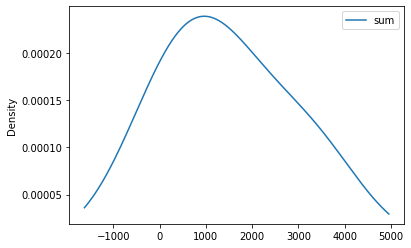

In [17]:
#Density plot of above summary statistic
career_HOF_Batting_summary.plot.kde()


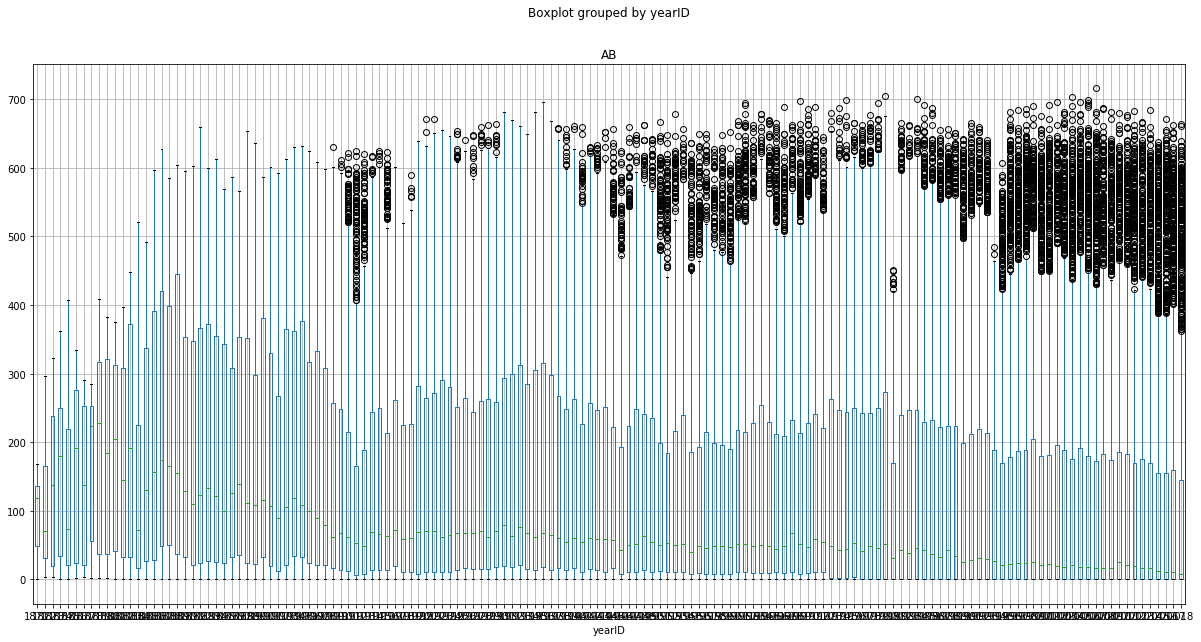

In [18]:
#Homerun boxplot by year
Reg_Batting.boxplot("AB", by="yearID", figsize=(20, 10))

In [25]:
#Post_Batting.boxplot("HR", by="yearID", figsize=(20, 10))

In [26]:
#HOF_Post_Batting.boxplot("HR", by="yearID", figsize=(20, 10))

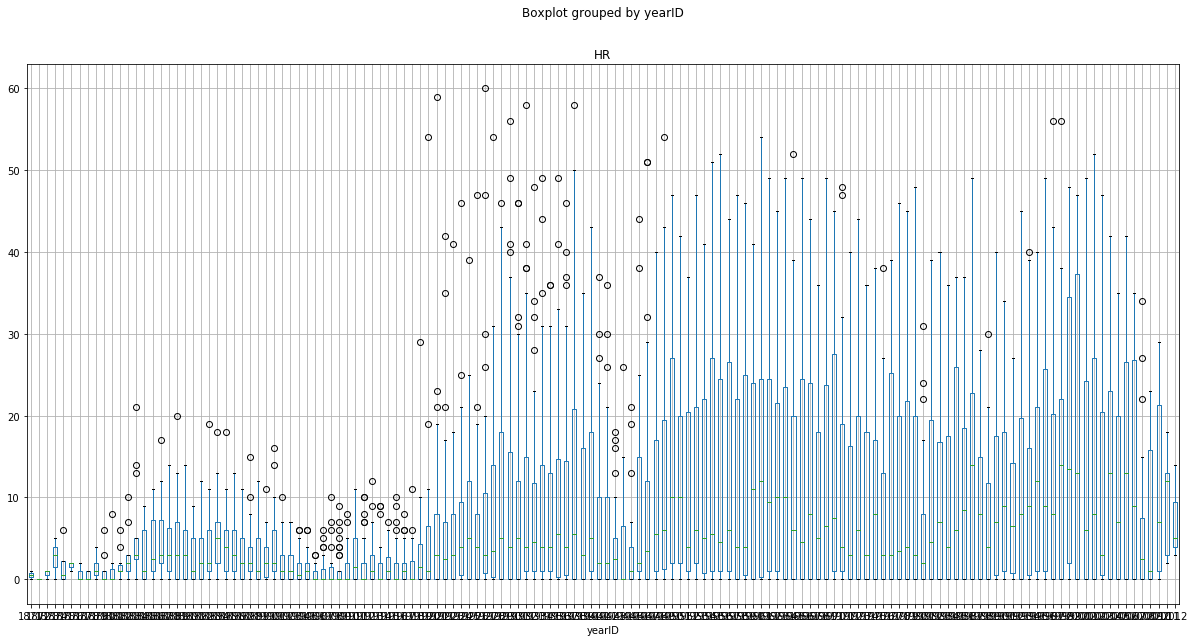

In [35]:
HOF_Batting.boxplot("HR", by="yearID", figsize=(20, 10))

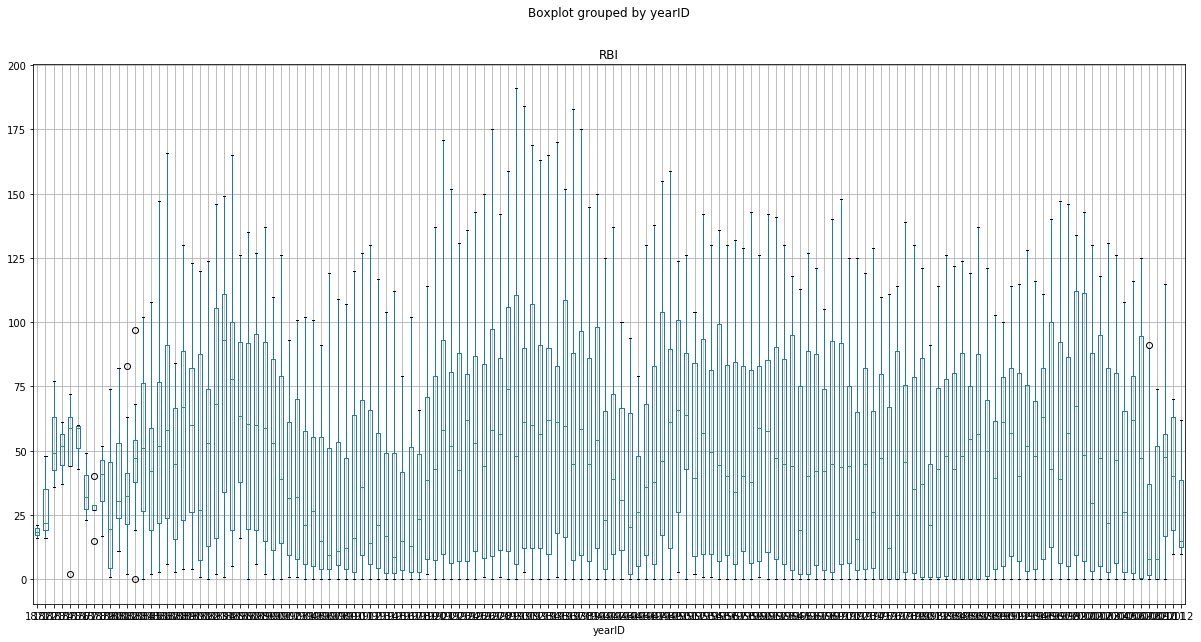

In [33]:
HOF_Batting.boxplot("RBI", by="yearID", figsize=(20, 10))